Car exhaust contains gases such as carbon dioxide, carbonmonoxide, nitogn gasses and hydrocarbons that contribute to global climate change. Such gases trap heat in the atmosphere, creating a greenhouse effect that contributes to the warming of the Earth's atmosphere, causing widespread climate change.

Vehicle exhausts make a major contribution to air pollution and have 
important health effects. Day-to-day fluctuations in pollutant levels 
appear to produce short-term variations in deaths, respiratory symptoms, 
and episodes of cardiovascular disease. Longer term exposure is 
associated with death rates, chronic respiratory disease, and chronic 
cardiovascular disease. There is also some evidence that vehicle exhaust 
exposure increases the risk of cancer and impairs fetal development.

Source(Volume 6, M. Burr, C. Gregory, in Encyclopedia of Environmental Health(Second Edition), 2011)

Vehicle exhaust gases and pollutants
Cars emit a potent cocktail of exhaust gases, many of which have harmful effects. They include:
-	Carbon dioxide (CO2) – CO2 is a greenhouse gas, thought to be a major contributing factor to climate change. Although technically non-toxic, excessive volumes contribute towards ocean acidification.
-	Carbon monoxide (CO) – This invisible gas is the result of incomplete combustion of fuel and is very toxic to humans. Most modern engines only produce tiny amounts of it thanks to efficient combustion processes, but older engines are bigger offenders.
-	Nitrogen oxides (NOx) – Nitrogen oxides are produced in any combustion process. They are highly reactive and can contribute to smog when they come into contact with other airborne chemicals. Some manufacturers famously cheated NOx tests.
-	Sulfur dioxide (SO2) – This is a colourless gas that smells like burnt matches and occurs naturally in crude oil used to refine petrol and diesel. It forms acids when burned, leading to engine corrosion and smog. 
-	Hydrocarbons (HC) – HCs escape from exhausts as unburnt fuel due to incomplete combustion. They also evaporate from the fuel tank and nozzle when you fill up at the petrol station. 
-	Benzene (C6H6) – This occurs naturally in petrol and diesel in very small quantities and is also emitted from vehicle exhausts as unburnt fuel. Benzene is a carcinogenic substance and high levels of inhalation can severely harm human health. 
-	Particulates – Diesel engines emit airborne particles of black soot and metal, known as particulate matter. Modern cars are fitted with diesel particulate filters (DPFs) to stop these harmful particles being pumped out into the atmosphere.


![img](Picture1.jpg)

CARBON MONOXIDE
Carbon monoxide is a colorless, tasteless and odorless gas in itself, and is one of the chief culprits that make exhaust fumes hazardous to human health, as it binds to the hemoglobin in our blood, which results in suffocation.
If exposed to even a minuscule amount (0.0035%) of carbon monoxide constantly for 6-8 hours, one will start experiencing the initial symptoms of carbon monoxide poisoning, which include lightheadedness, confusion, dizziness, and headache. It increasingly becomes worse as the concentration of the gas in the air rises.

Nitrogen Oxide (NOx) Emission
The release of nitrogen oxides (NOx = NO + NO2) has accelerated during the last few decades primarily through increase in fossil fuel combustion. The NOx emission is predominantly contributed by sources such as vehicular exhaust, coal combustion, and biomass burning. The higher temperatures in the flame during combustion are generally responsible for the formation of NOx as it helps in breaking down the molecular nitrogen and oxygen of the air, which recombine to form NOx which includes both nitric oxide (NO) and nitrogen dioxide (NO2). In addition, the nitrogen content of the fuel
Nitrogen oxides are a potent irritant of the respiratory system, penetrating deep into lung tissue, causing respiratory diseases, wheezing, bronchospasm, and even pulmonary edema at high levels. Moreover, concentrations over 2 ppm can affect the immune system, particularly the CD8+ T cells.
Long-term exposure to nitrogen dioxide is reported to be linked to the development of chronic lung disease, as well as impairing individuals' sense of smell



## IMPORT 
> - LIBRARIES AND MODULES 
> - MERGE AND IMPORT MERGED DATASET 

In [2]:
# DATA WRANGLING MODULES 
import numpy  as np
import pandas as pd

# VISUALIZATION LIBRARIES
import matplotlib.pyplot    as plt
import seaborn              as sns
from   skimpy               import skim
#import pandas_profiling
 
# FOR SPLITING DATA INTO TEST AND TRAIN 
from sklearn.model_selection import train_test_split

# ML & DL Modules 
import tensorflow as tf
from   tensorflow.keras.models import Sequential
from   tensorflow.keras.layers import Dense , Dropout , BatchNormalization, Normalization

c:\Users\Owner\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Merging muliple csv files
df = pd.concat(
    map(pd.read_csv, [str(x) + ".csv" for x in list(range(1,8))]), ignore_index=True)

# REMOVE EMPTY COLUMNS
df = df.iloc[: , :-4]

# show shape of dataset
df.shape 

(700, 37)

In [4]:
output_params = ['CO','NOx']

#The SELECTED INPUT PARAMS HAVE BEEN CHOOSEN FROM PRAMETERS THAT CAN BE MEASURED WITHOUT THE USE OF COMPLICATED EQUIPMENTS
input_params  = ['IMEP_net',    'Torque',
                 'Pmax',        'Comb_dura', 
                 'IntakeTemp',  'IntakePres',
                 'ISFC' ,       'SparkTiming',
                 'InjTiming',   'InjPulseWidth', 
                 'AirFlowRate', 'FuelFlowRate'
                 ]

df_output = df[output_params]
df_input  = df[input_params]

# APPEND INPUT AND OUTPUT COLUMNS 
df1 = pd.concat([df_input , df_output], axis = 'columns')

df1.head()

,IMEP_net,Torque,Pmax,Comb_dura,IntakeTemp,IntakePres,ISFC,SparkTiming,InjTiming,InjPulseWidth,AirFlowRate,FuelFlowRate,CO,NOx
0,3.512449,5.5,23.608920,23.990410,32.4915,0.480802,-80.493989,-20.0,422.0,1.056,0.128948,-2.74933,3336.2,2315.6
1,3.573733,5.5,26.535611,20.985482,32.5005,0.480709,-79.244290,-20.0,422.0,1.056,0.129013,-2.75387,3336.2,2318.9
2,3.529456,5.5,21.850524,24.991877,32.5005,0.480174,-80.238401,-20.0,422.0,1.056,0.129013,-2.75387,3336.2,2318.9
3,3.506237,5.5,22.756638,25.991299,32.5005,0.480443,-80.769760,-20.0,422.0,1.056,0.129013,-2.75387,3336.2,2318.9
4,3.578026,5.5,23.412495,24.991188,32.4987,0.479848,-79.149479,-20.0,422.0,1.056,0.129169,-2.75388,3336.2,2326.3


## DATA EXPLORATION 
> - DATA CLEANING 
>    - CHECK FOR MISSING VALUES  
>    - SKIM DATA     
>    - CHECK FOR OUTLIERS 
> - DATA WRANGLING 
>    - Any necessary columns to be added
> - EDA
>   - EXPLORE TRENDS 
>   - FIND STRONGEST CORRELATIONS 

In [5]:
df1.isna().any()
# There are no missing values inthe data, our data is squeaky clean 

IMEP_net         False
Torque           False
Pmax             False
Comb_dura        False
IntakeTemp       False
IntakePres       False
ISFC             False
SparkTiming      False
InjTiming        False
InjPulseWidth    False
AirFlowRate      False
FuelFlowRate     False
CO               False
NOx              False
dtype: bool

There are no columns with missing values, so lets go futhur to understanding our data

Lets proceed to EDA 
- skim to undestand distribution
- use hist plot to dive deeper into each distribution
- use scatter plots and line plots to find relationships 
- use a heatmap to find correlation 

In [6]:
skim(df1)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 700    │ │ float64     │ 14    │                                    │
│ │ Number of columns │ 14     │ └─────────────┴───────┘                                    │
│ └───────────────────┴────────┘                                                            │
│                                          number                                           │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %  ┃ mean  ┃ sd     ┃ p0    ┃ p25  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ IMEP_net        │   0 │     0 │   5.1 │    2.2 │   2.1 │  2.9 │  7.3 │  8.8 │ █▄▄▄▄▄ │  │
│ │ Torque          │   0 │     0 │   9.9 │      6 │     2 │    4 │   16 │   20 │ █▄▄▄▄▄ │  │
│ │ Pmax            │   0 │     0 │    32 │     12 │    13 │   22 │   41 │   59 │ ▆█▅▆▅▂ │  │
│ │ Comb_dura       │   0 │     0 │    23 │    2.6 │    15 │   22 │   25 │   31 │ ▁▃██▃  │  │
│ │ IntakeTemp      │   0 │     0 │    33 │   0.42 │    32 │   32 │   33 │   33 │ █▂▂  ▂ │  │
│ │ IntakePres      │   0 │     0 │  0.61 │   0.19 │  0.37 │ 0.43 │  0.8 │ 0.91 │ █▄▄▄▄▄ │  │
│ │ ISFC            │   0 │     0 │   -30 │    110 │  -130 │  -97 │  -39 │  240 │ ██   ▃ │  │
│ │ SparkTiming     │   0 │     0 │   -20 │    2.1 │   -23 │  -22 │  -18 │  -17 │ ▃▃ ▃▃█ │  │
│ │ InjTiming       │   0 │     0 │   420 │    2.9 │   420 │  420 │  430 │  430 │ ▄▄█ ▇▅ │  │
│ │ InjPulseWidth   │   0 │     0 │   1.2 │   0.33 │   0.8 │ 0.95 │  1.6 │  1.8 │ █▄█ ▄▄ │  │
│ │ AirFlowRate     │   0 │     0 │  0.17 │  0.065 │ 0.089 │ 0.11 │ 0.24 │ 0.28 │ █▄▄▄▄▄ │  │
│ │ FuelFlowRate    │   0 │     0 │  0.47 │    7.9 │  -2.8 │ -2.8 │ -2.7 │   20 │ █    ▁ │  │
│ │ CO              │   0 │     0 │  3400 │     20 │  3300 │ 3300 │ 3400 │ 3400 │ █▄▄▄▄▄ │  │
│ │ NOx             │   0 │     0 │  2700 │    740 │  1300 │ 2100 │ 3400 │ 3600 │ ▃▂▄▃ █ │  │
│ └─────────────────┴─────┴───────┴───────┴────────┴───────┴──────┴──────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

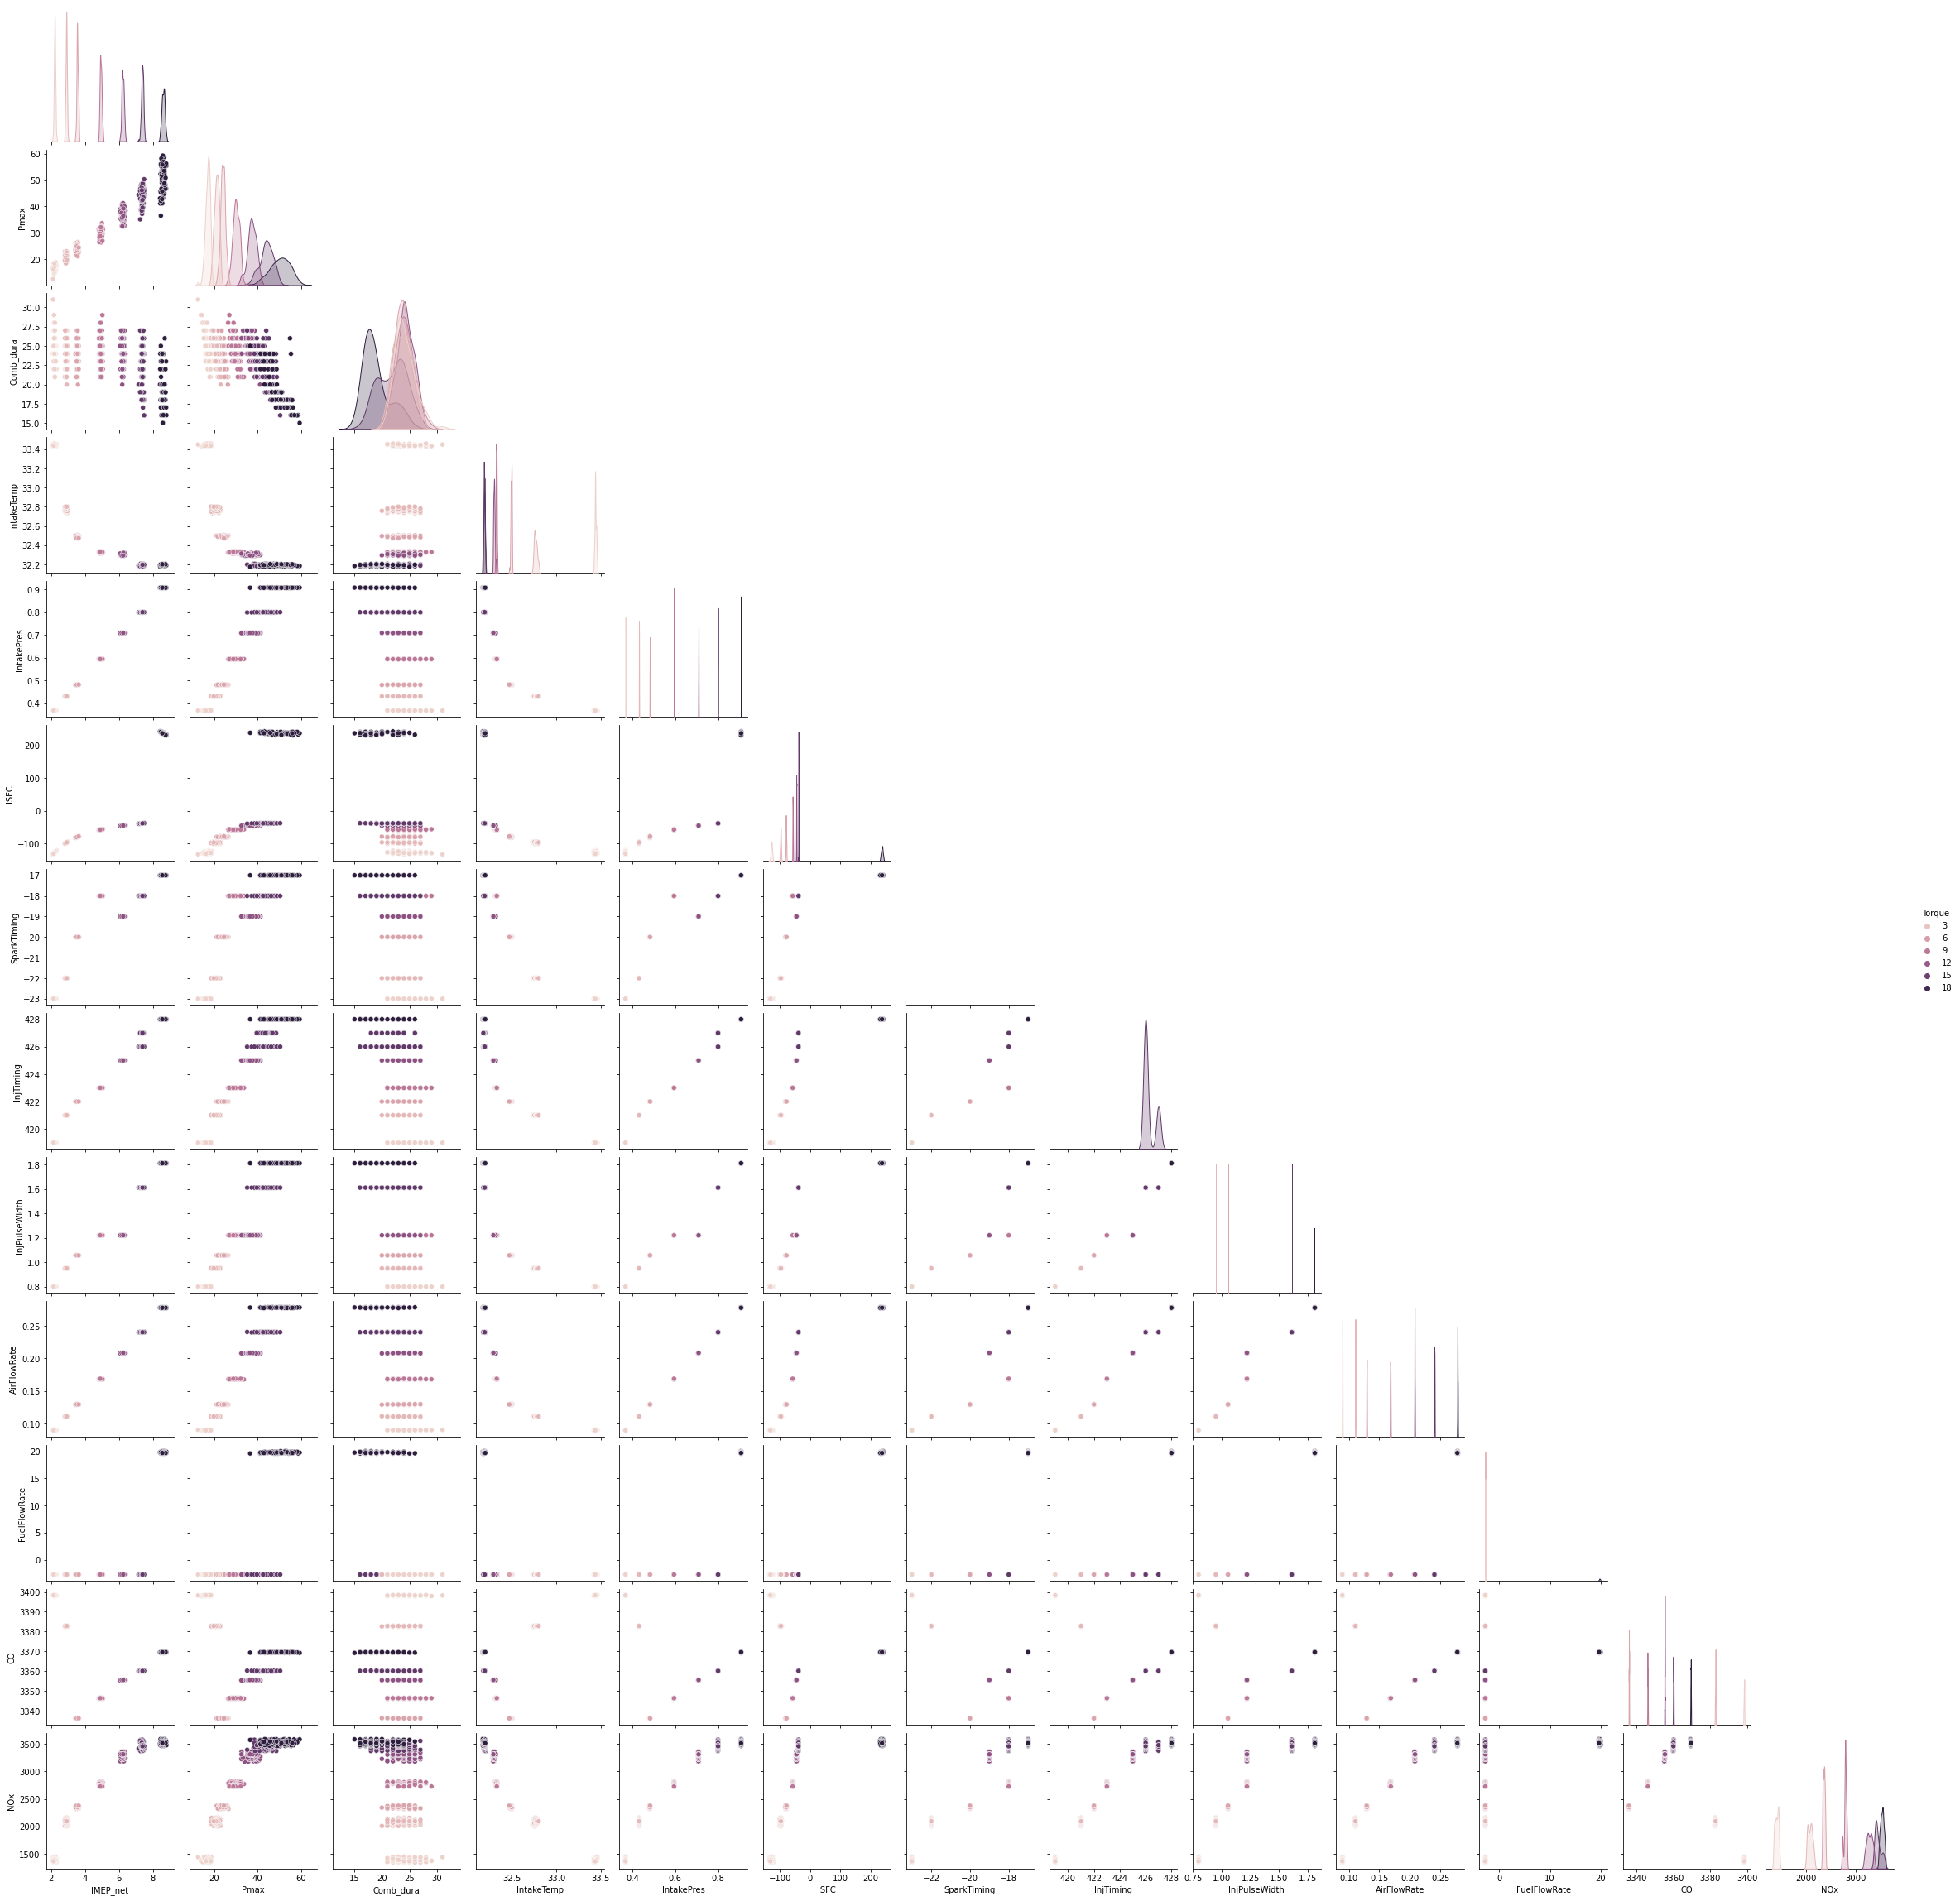

In [7]:
# Pairplots to show find relationships and trends 
sns.pairplot(df1, hue = 'Torque', corner=True)

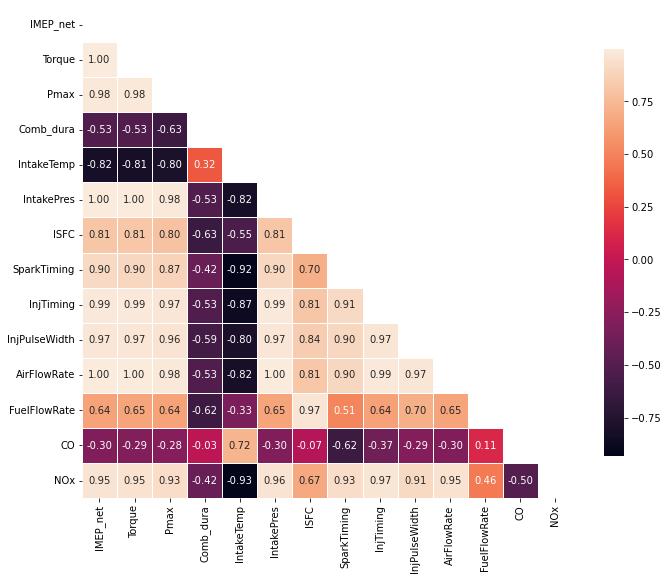

In [8]:

##create correlation table 
df_corr = df1.corr()

##create mask to remove upper boundaries 
mask = np.zeros_like(df_corr, dtype = bool)
mask[np.triu_indices_from(mask)]= True

##plot heatmap
f, ax = plt.subplots(figsize=(11, 15))
sns.heatmap(df_corr, 
            annot=True, 
            fmt='.2f', 
            mask=mask, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})
#add the column names as labels
ax.set_yticklabels(df_corr.columns, rotation = 0)
ax.set_xticklabels(df_corr.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [9]:
# MAKE EMPHASIS ON CO AND NOx
# SORT VALUES BY HIGHEST CORRELATION - CO 
abs(df_corr.CO).sort_values(ascending=False)[1:]

IntakeTemp       0.724175
SparkTiming      0.616988
NOx              0.504218
InjTiming        0.370786
IMEP_net         0.303966
AirFlowRate      0.301140
IntakePres       0.300726
Torque           0.293481
InjPulseWidth    0.286263
Pmax             0.281460
FuelFlowRate     0.112071
ISFC             0.070821
Comb_dura        0.029005
Name: CO, dtype: float64

In [10]:
# SORT VALUES BY HIGHEST CORRELATION - NOx
abs(df_corr.NOx).sort_values(ascending=False)[1:]

InjTiming        0.969147
IntakePres       0.955315
IMEP_net         0.954659
AirFlowRate      0.954401
Torque           0.953494
IntakeTemp       0.933985
SparkTiming      0.930968
Pmax             0.930880
InjPulseWidth    0.905835
ISFC             0.671100
CO               0.504218
FuelFlowRate     0.462157
Comb_dura        0.417139
Name: NOx, dtype: float64

In [11]:
target_params  = ['CO', 'NOx']

CO_params   = [x for x in list(df_corr.CO[abs(df_corr.CO) > 0.2].index) if x not in  target_params ]
NOx_params  = [x for x in list(df_corr.NOx[abs(df_corr.NOx) > 0.9].index) if x not in  target_params ]

# Check if CO and Nox use the same columns
CO_params == NOx_params

True

In [12]:
features  = CO_params

Here we remove the least correlating values 

> - For NOx, > 90%

> - For CO, > 20%

In [13]:
# BUILD A VIS FUNCTIONS FOR JOINTPLOT AND  REGPLOT 

def explore_rel(data , xcol, ycol, degree = 4, zcol='Torque' ): 
    
    #Initilize plot frame
    plot_objects = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    fig, ((ax1, ax2)) = plot_objects
    
    #make plots 
    sns.scatterplot(x = data[xcol], y = data[ycol], hue = data[zcol], ax=ax1) 
    sns.regplot    (x = data[xcol], y = data[ycol], order = degree , ax=ax2)
    
    #Label plots 
    
    #First PLot
    ax1.set_title(f'Plot of {xcol} aganist {ycol} ')
    
    #Second PLot
    ax2.set_title(f'Plot of {xcol} aganist {ycol} Showing trends')

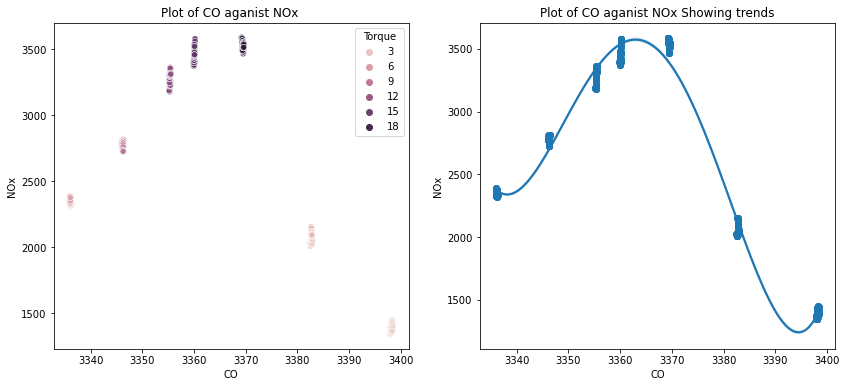

In [14]:
# lets discover if nitrogen has the same pattern with carbon-mono-oxide

explore_rel(df1, xcol = 'CO', ycol = 'NOx')

We can clearly see that the maximum NOx emissions occures when CO emissions are its mean values (3364ppm) and higher Torques values

### PLOT RELATIONSHIPS WITH THE HIGHEST CORELATIONS WITH CO
- IntakeTemp      
- SparkTiming     

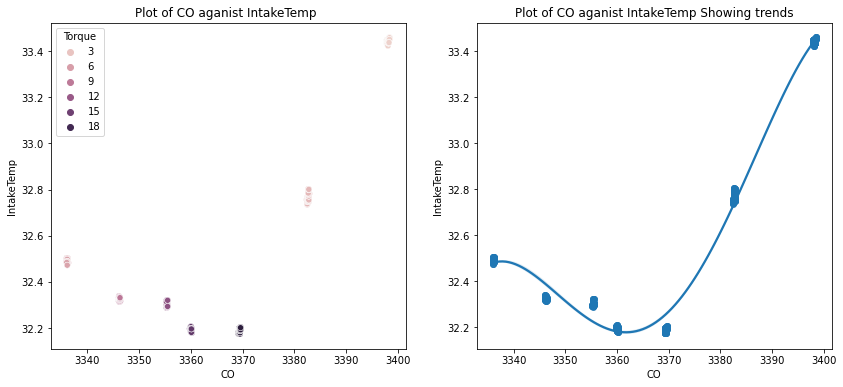

In [15]:
explore_rel(df1, xcol = 'CO', ycol = 'IntakeTemp')

The lower the intake temp and the  

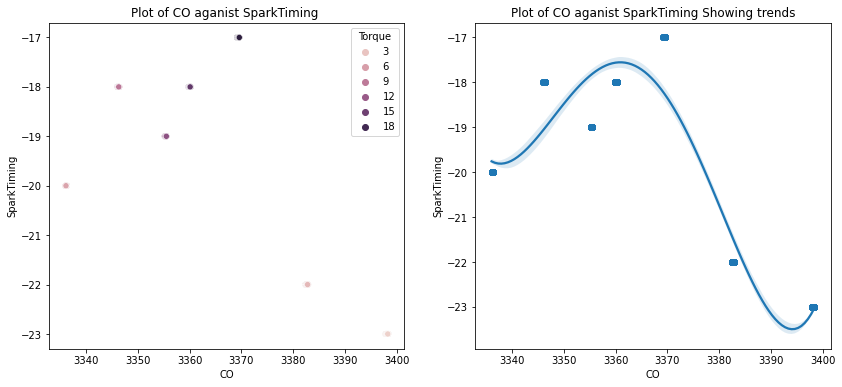

In [16]:
explore_rel(df1, xcol = 'CO', ycol = 'SparkTiming', degree=4)

### PLOT RELATIONSHIPS WITH THE HIGHEST CORELATIONS WITH NOx
- InjTiming    
- IntakePres 

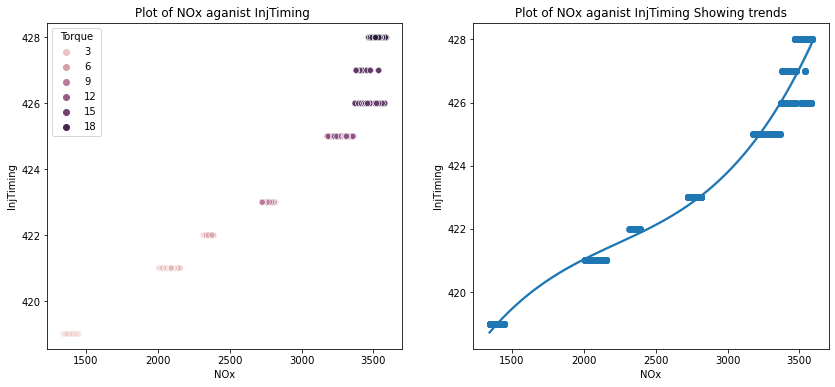

In [17]:
explore_rel(df1, xcol = 'NOx', ycol = 'InjTiming', degree=3)

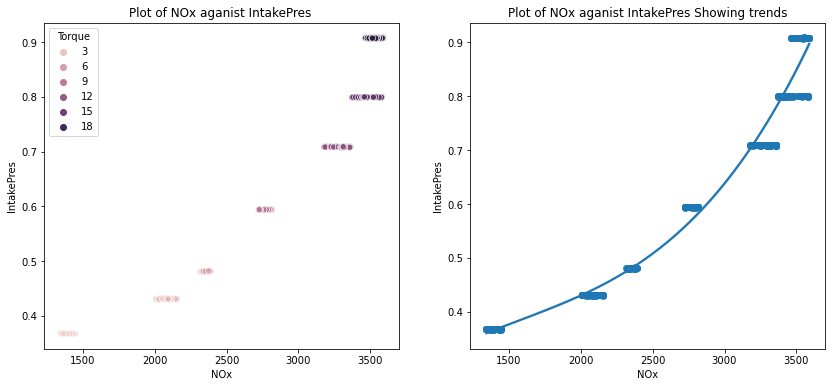

In [18]:
explore_rel(df1, xcol = 'NOx', ycol = 'IntakePres', degree=3)

## MODEL CREATION
> - Choose NN architecture
> - Train, Test and Cross_eval Splits  
> - Normalization (if Necessary)
> - Create dense layers 
> - Evaluate and tune hyper-parameters 
> - 

DNN Architecture 

<img src="dvw3.png">

In [26]:
# SPLIT DATA INTO TRAINING AND TEST SETS

# shuffle the DataFrame rows
df1 = df1.sample(frac = 1)

x_train, x_test, y_train, y_test = train_test_split( df1[features], 
                                                     df1[target_params],
                                                     train_size   =  0.75, 
                                                     random_state =  4)


loss_metrics = ['mse', 'mae', 'mape', 'msle',]

Epoch 1/100
17/17 [==============================] - 4s 6ms/step - loss: 2962.2346 - mse: 9201120.0000 - mae: 2962.2346 - mape: 97.1271 - msle: 37.6325
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 2805.8193 - mse: 8446798.0000 - mae: 2805.8193 - mape: 90.8467 - msle: 34.6211
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 2525.2510 - mse: 7341962.0000 - mae: 2525.2510 - mape: 79.5813 - msle: 33.4882
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 2160.4402 - mse: 6276629.0000 - mae: 2160.4402 - mape: 66.6294 - msle: 33.0836
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 1964.7498 - mse: 5880806.0000 - mae: 1964.7498 - mape: 62.8486 - msle: 33.0170
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 1956.7140 - mse: 5886601.5000 - mae: 1956.7140 - mape: 63.7871 - msle: 33.0216
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 1946.9304 - mse

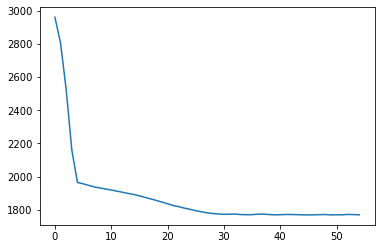

In [46]:
model = Sequential(
    [
        Dense(16, activation = 'relu',    name = "L1"),
        Dense(2, activation  = 'relu',  name = "output")
    ]  )

model.compile(
    loss      = 'MAE',
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics   = loss_metrics )

model.fit(
    x_train,
    y_train,
    epochs=100,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor ="loss", 
                                                 mode ="min", 
                                                 patience = 5, 
                                                restore_best_weights = True)  #STOPS MODEL FROM OVERTRAINING  
            )


plt.plot(model.history.history['loss'])

Epoch 1/100
17/17 [==============================] - 4s 7ms/step - loss: 2869.7251 - mse: 8642827.0000 - mae: 2869.7251 - mape: 94.0608 - msle: 14.2095
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 2488.5134 - mse: 6583500.5000 - mae: 2488.5134 - mape: 80.8748 - msle: 3.0845
Epoch 3/100
17/17 [==============================] - 0s 8ms/step - loss: 1894.0312 - mse: 4007431.2500 - mae: 1894.0312 - mape: 59.9275 - msle: 1.0380
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 1118.9008 - mse: 1501949.8750 - mae: 1118.9008 - mape: 35.8390 - msle: 0.2406
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 465.3150 - mse: 351714.7500 - mae: 465.3150 - mape: 19.3800 - msle: 0.0594
Epoch 6/100
17/17 [==============================] - 0s 9ms/step - loss: 366.8412 - mse: 298839.6250 - mae: 366.8412 - mape: 17.2602 - msle: 0.0557
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 332.9183 - mse: 221437.968

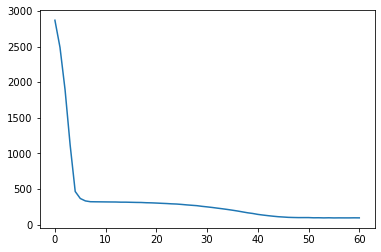

In [35]:
model1 = Sequential(
    [
        Dense(16, activation = 'relu',    name = "L1"),
        Dense(2, activation  = 'linear',  name = "output")
    ])

model1.compile(
    loss      = 'MAE',
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics   = loss_metrics)

model1.fit(
    x_train,
    y_train,
    epochs=100,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor ="loss", 
                                                 mode ="min", 
                                                 patience = 5, 
                                                restore_best_weights = True)  #STOPS MODEL FROM OVERTRAINING  
            )


plt.plot(model1.history.history['loss'])

Epoch 1/100
17/17 [==============================] - 4s 8ms/step - loss: 3031.3020 - mse: 9561555.0000 - mae: 3031.3020 - mape: 99.9458 - msle: 52.9203
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 3028.7808 - mse: 9544612.0000 - mae: 3028.7808 - mape: 99.8710 - msle: 48.1281
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 3024.0210 - mse: 9512720.0000 - mae: 3024.0210 - mape: 99.7295 - msle: 44.4206
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 3014.5801 - mse: 9449759.0000 - mae: 3014.5801 - mape: 99.4488 - msle: 41.1002
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 2996.0713 - mse: 9327405.0000 - mae: 2996.0713 - mape: 98.8984 - msle: 38.2548
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 2959.8196 - mse: 9091895.0000 - mae: 2959.8196 - mape: 97.8208 - msle: 35.9199
Epoch 7/100
17/17 [==============================] - 0s 7ms/step - loss: 2887.3521 - mse

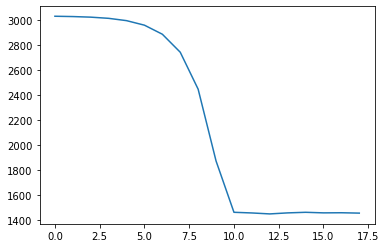

In [36]:
model2 = Sequential(
    [   Dense(64, activation = 'relu',    name = "L1"),
        Dropout(0.2),
        Dense(16, activation = 'tanh',    name = "L2"),
        Dropout(0.1),
        Dense(8, activation  = 'linear',  name = "L3"),
        Dense(2, activation  = 'relu',    name = "output")
    ])

model2.compile(
    loss      = 'MAE',
    optimizer = tf.keras.optimizers.SGD(0.01),
    metrics   = loss_metrics)

model2.fit(
    x_train,
    y_train,
    epochs=100,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor ="loss", 
                                                 mode ="min", 
                                                 patience = 5, 
                                                restore_best_weights = True)  #STOPS MODEL FROM OVERTRAINING  
            )


plt.plot(model2.history.history['loss'])

Epoch 1/100
17/17 [==============================] - 4s 9ms/step - loss: 2995.1753 - mse: 9348304.0000 - mae: 2995.1753 - mape: 98.6464 - msle: 23.4471
Epoch 2/100
17/17 [==============================] - 0s 9ms/step - loss: 2818.5142 - mse: 8332277.5000 - mae: 2818.5142 - mape: 92.3929 - msle: 7.4184
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 2435.6792 - mse: 6350935.5000 - mae: 2435.6792 - mape: 78.7999 - msle: 2.7846
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 1791.2671 - mse: 3624483.0000 - mae: 1791.2671 - mape: 56.4662 - msle: 0.8725
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 1012.3088 - mse: 1238281.7500 - mae: 1012.3088 - mape: 32.9631 - msle: 0.1889
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 465.3959 - mse: 374912.6250 - mae: 465.3959 - mape: 20.0134 - msle: 0.0636
Epoch 7/100
17/17 [==============================] - 0s 9ms/step - loss: 401.2392 - mse: 328599.

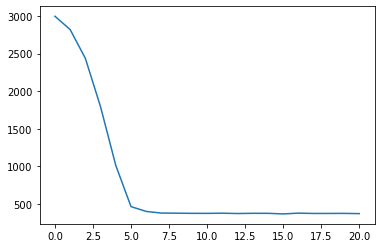

In [37]:
model3 = Sequential(
    [   Dense(128, activation = 'relu',    name = "L1"),
        Dropout(0.2),
        Dense(64, activation = 'tanh',    name = "L2"),
        Dropout(0.1),
        Dense(32, activation  = 'linear',  name = "L3"),
        Dense(2, activation  = 'relu',    name = "output")
    ])

model3.compile(
    loss      = 'MAE',
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics   = loss_metrics)

model3.fit(
    x_train,
    y_train,
    epochs=100,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor ="loss", 
                                                 mode ="min", 
                                                 patience = 5, 
                                                restore_best_weights = True)  #STOPS MODEL FROM OVERTRAINING  
            )


plt.plot(model3.history.history['loss'])

Epoch 1/100
17/17 [==============================] - 10s 18ms/step - loss: 9535508.0000 - mse: 9535508.0000 - mae: 3027.0405 - mape: 99.7990 - msle: 44.4508
Epoch 2/100
17/17 [==============================] - 0s 19ms/step - loss: 9252653.0000 - mse: 9252653.0000 - mae: 2980.0823 - mape: 98.1838 - msle: 27.3379
Epoch 3/100
17/17 [==============================] - 0s 17ms/step - loss: 8017883.0000 - mse: 8017883.0000 - mae: 2750.4265 - mape: 89.9468 - msle: 17.0625
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 5076302.0000 - mse: 5076302.0000 - mae: 1977.3019 - mape: 62.2957 - msle: 4.1148
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 2744175.7500 - mse: 2744175.7500 - mae: 1263.2245 - mape: 41.5640 - msle: 0.9949
Epoch 6/100
17/17 [==============================] - 0s 10ms/step - loss: 696228.1875 - mse: 696228.1875 - mae: 643.8033 - mape: 22.1363 - msle: 0.1454
Epoch 7/100
17/17 [==============================] - 0s 9ms/step - loss

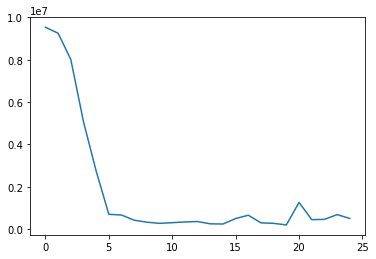

In [38]:
model4= Sequential(
    [
        Dense(128, activation = 'relu', kernel_initializer='normal',  name = "L1"),
        BatchNormalization(),
        Dense(64, activation  = 'linear', kernel_initializer="he_normal" ,name = "L2"),
        Dense(32, activation  = 'tanh',    name = "L3"),
        BatchNormalization(),
        Dense(16, activation  = 'softplus',name = "L4"),
        Dense(4, activation  = 'relu',    name = "L5"),
        Dense(2, activation  = 'relu',  name = "output")
    ]  )       

model4.compile(
    loss      = 'mse',
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics   =  loss_metrics
    )

model4.fit( x_train,
            y_train,
            epochs=100,
            callbacks = tf.keras.callbacks.EarlyStopping(monitor ="loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True))


plt.plot(model4.history.history['loss'])

## MODEL EVALUATION 

In [47]:
model.evaluate(x_test,y_test)

6/6 [==============================] - 1s 11ms/step - loss: 1778.1890 - mse: 5697899.0000 - mae: 1778.1890 - mape: 54.7688 - msle: 32.9906


[1778.18896484375,
 5697899.0,
 1778.18896484375,
 54.76875686645508,
 32.99063491821289]

In [40]:
model1.evaluate(x_test,y_test)

6/6 [==============================] - 0s 5ms/step - loss: 102.1370 - mse: 34429.6094 - mae: 102.1370 - mape: 5.0685 - msle: 0.0098


[102.13697814941406,
 34429.609375,
 102.13697814941406,
 5.0684943199157715,
 0.009820600971579552]

In [41]:
model2.evaluate(x_test,y_test)

6/6 [==============================] - 1s 6ms/step - loss: 1390.9819 - mse: 3856043.5000 - mae: 1390.9819 - mape: 51.7075 - msle: 30.7873


[1390.98193359375,
 3856043.5,
 1390.98193359375,
 51.707481384277344,
 30.78731346130371]

In [42]:
model3.evaluate(x_test,y_test)

6/6 [==============================] - 1s 7ms/step - loss: 352.0780 - mse: 294945.9062 - mae: 352.0780 - mape: 16.2993 - msle: 0.0560


[352.0780029296875,
 294945.90625,
 352.0780029296875,
 16.299335479736328,
 0.05604099854826927]

In [43]:
model4.evaluate(x_test,y_test)

6/6 [==============================] - 1s 7ms/step - loss: 483640.0312 - mse: 483640.0312 - mae: 512.4633 - mape: 18.1245 - msle: 0.0752


[483640.03125,
 483640.03125,
 512.4633178710938,
 18.12445068359375,
 0.07521238178014755]

The best model is a simple regression model instead of a deep neural network
model1 seem to work best on our training dataset 